In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_venn

# Connect to the database
mydb = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="root",
    database="sprint"
)
query = """
    SELECT *
    FROM companies
"""

query2 = """
    SELECT *
    FROM transactions
"""
query3 = """
    SELECT *
    FROM credit_cards
"""
query4 = """
    SELECT *
    FROM users
"""
query5 = """
    SELECT *
    FROM products
"""
df_comp = pd.read_sql(query, con=mydb)
df_comp.head()

df_trans = pd.read_sql(query2, con=mydb)
df_trans.head()

df_users = pd.read_sql(query4, con=mydb)
df_users.head()

D:\users\ciberconnecta_12\AppData\Local\Temp\ipykernel_5788\3658132868.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_comp = pd.read_sql(query, con=mydb)
D:\users\ciberconnecta_12\AppData\Local\Temp\ipykernel_5788\3658132868.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_trans = pd.read_sql(query2, con=mydb)
D:\users\ciberconnecta_12\AppData\Local\Temp\ipykernel_5788\3658132868.py:41: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_users = pd.read_sql(query4, con=mydb)


,id,name,surname,phone,email,birth_date,country,city,postal_code,address
0,1,Zeus,Gamble,1-282-581-0551,interdum.enim@protonmail.edu,"Nov 17, 1985",United States,Lowell,73544,348-7818 Sagittis St.
1,2,Garrett,Mcconnell,(718) 257-2412,integer.vitae.nibh@protonmail.org,"Aug 23, 1992",United States,Des Moines,59464,903 Sit Ave
2,3,Ciaran,Harrison,(522) 598-1365,interdum.feugiat@aol.org,"Apr 29, 1998",United States,Columbus,56518,736-2063 Tellus St.
3,4,Howard,Stafford,1-411-740-3269,ornare.egestas@icloud.edu,"Feb 18, 1989",United States,Kailua,77417,Ap #545-2244 Erat. Rd.
4,5,Hayfa,Pierce,1-554-541-2077,et.malesuada.fames@hotmail.org,"Sep 26, 1998",United States,Sandy,31564,341-2821 Ultrices Av.


- Exercici 1 - Una variable numèrica.

Pongo el dataframe para ver de cual empiezo y que sea fácil de seguir. Hago un merge entre dataframe de transactions y el de companies para poder hacer un gráfico de densidad por max amount. Utilizo un kdeplot para que salga la gráfica de densidad. Nos muestra que los pedidos más altos, aunque pocos están cerca de los 500. Los países con los pedidos más altos son, Alemania, United Kingdom, Noruega, Suecia e Irlanda, todos por encima de los 490€.

                amount  declined  user_id      lat  longitude
country                                                      
Australia       480.13         1      275  89.4292   155.5270
Belgium         439.72         1      275  59.5109   133.8460
Canada          481.75         1      275  82.3480   171.9420
China           289.04         1      275  49.6029    54.0765
France          343.50         1      273  73.3401   128.8790
Germany         499.23         1      275  89.0823   174.0330
Ireland         492.25         1      275  87.6079   179.9500
Italy           444.16         1      275  83.6613   165.4530
Netherlands     471.54         1      272  76.2816   168.0050
New Zealand     428.69         1      275  74.1054   169.4670
Norway          494.17         1      275  85.6263   178.9230
Spain            80.58         1      272  77.9371   -39.7162
Sweden          492.19         1      275  89.9212   179.8860
United Kingdom  494.82         1      275  89.5345   179.1710
United S

D:\users\ciberconnecta_12\AppData\Local\Temp\ipykernel_9908\1287962303.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_trans = pd.read_sql(query2, con=mydb)


<Axes: xlabel='amount', ylabel='Density'>

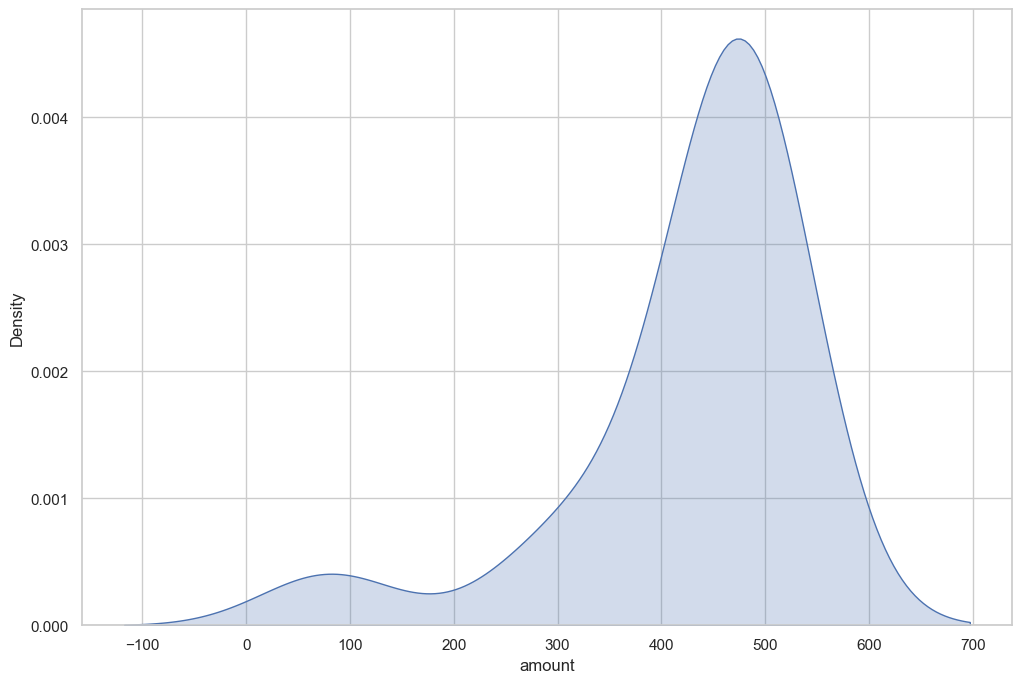

In [7]:
#ej 1 variable numerica

df_trans = pd.read_sql(query2, con=mydb)
df_transcomp = pd.merge(df_trans, df_comp, left_on = "business_id", right_on = "company_id", how="inner")
res_transcomp = df_transcomp.groupby("country").max("amount")
print(res_transcomp)

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.kdeplot(res_transcomp,x="amount", fill=True)

- Exercici 2 - Dues variables numèriques. (version original)

Partiendo de df_trans, que hace referencia a mi dataframe query2 que referencia a transacciones. Utilizo como variables la cantidad de pedidos por mes y la fecha dividida por mes y año. Convierto timestamp a fecha y de ahí lo paso a un formato mensual. Utilizo la función size para ver cuántas veces sale mencionado cada mes y así poder contar los pedidos por mes y le doy el nombre “orders”. Por último, con ayuda de chatgpt hag un annotate para que salga el número de pedidos por mes.

D:\users\ciberconnecta_12\AppData\Local\Temp\ipykernel_19052\331595173.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_trans = pd.read_sql(query2, con=mydb)


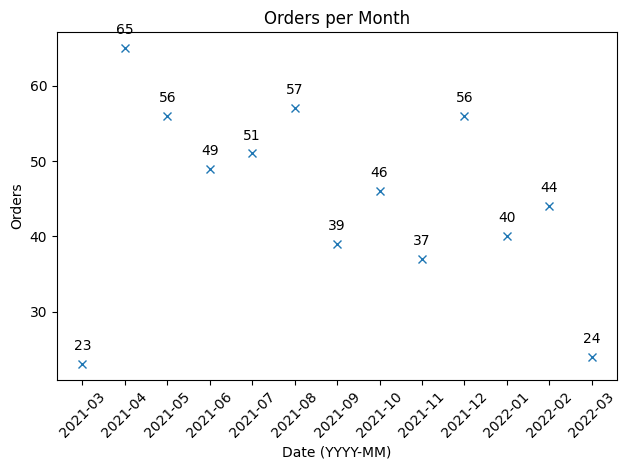

In [8]:
#2 variables numericas

df_trans = pd.read_sql(query2, con=mydb)

# Close the database connection
mydb.close()

# Convert the timestamp column to datetime format
df_trans['timestamp'] = pd.to_datetime(df_trans['timestamp'])

# Extract year and month from the timestamp
df_trans['year_month'] = df_trans['timestamp'].dt.to_period('M')

# Aggregate data: count orders per year_month
agg_df = df_trans.groupby('year_month').size().reset_index(name='orders')

# Convert year_month back to string for plotting
agg_df['year_month'] = agg_df['year_month'].astype(str)


plt.plot(agg_df['year_month'], agg_df['orders'], linestyle='none', marker='x')
for i in range(len(agg_df)):
    plt.annotate(
        agg_df['orders'][i],
        (agg_df['year_month'][i], agg_df['orders'][i]),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center')
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Orders')
plt.title('Orders per Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()


D:\users\ciberconnecta_12\AppData\Local\Temp\ipykernel_20748\3795432156.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q2 = pd.read_sql(query2, con=mydb)


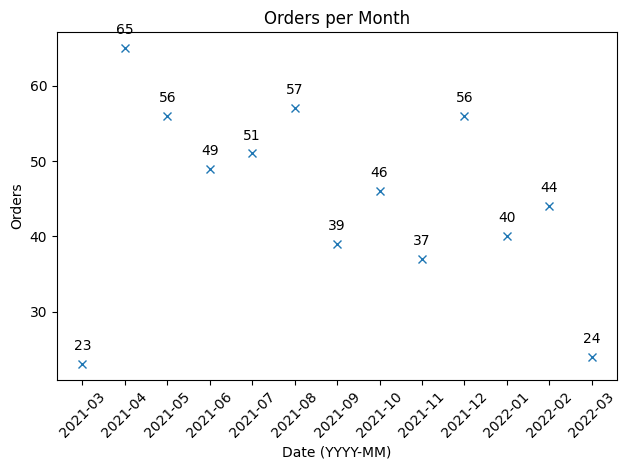

In [17]:
#2 variables numericas

df_trans = pd.read_sql(query2, con=mydb)

# Close the database connection
mydb.close()

# Convert the timestamp column to datetime format
df_trans['timestamp'] = pd.to_datetime(df_trans['timestamp'])

# Extract year and month from the timestamp
df_trans['year_month'] = df_trans['timestamp'].dt.to_period('M')

# Aggregate data: count orders per year_month
agg_df = df_trans.groupby('year_month').size().reset_index(name='orders')

# Convert year_month back to string for plotting
agg_df['year_month'] = agg_df['year_month'].astype(str)


plt.plot(agg_df['year_month'], agg_df['orders'], linestyle='none', marker='x')
for i in range(len(agg_df)):
    plt.annotate(
        agg_df['orders'][i],
        (agg_df['year_month'][i], agg_df['orders'][i]),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center')
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Orders')
plt.title('Orders per Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()

- Exercici 2 - Dues variables numèriques. (Corrección)

Partiendo de df_trans, que hace referencia a mi dataframe query2 que referencia a transacciones. Las variables que utilizo son la suma de pedidos y la cantidad total de amount. Para que funcione el gráfico lo hago usando los business_id para poder identificar las empresas y asi que ordenado e identificado aunque no se muestra en el gráfico.

Variable y = pedidos
Variable x = suma de amount.

Dejo dos versiones puestas, la primera ordena por cantidad de pedidos, la 2a versión por cantidad de amount.

Podemos ver que el top 6 de pedidos van entre 50 y más de 100 pedidos recaudando entre 14000€ y cerca de 26000€.

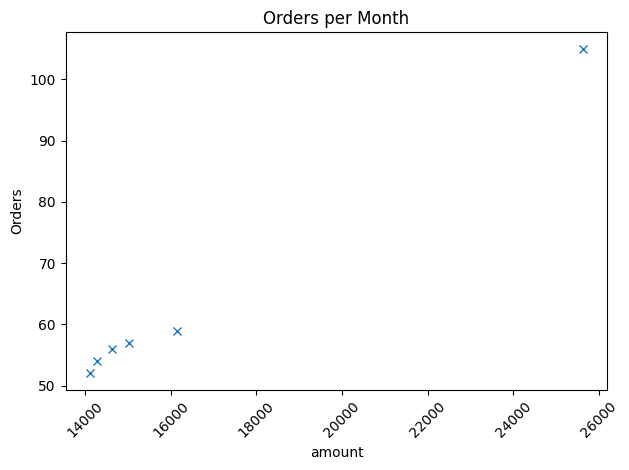

In [9]:
qa = df_trans.groupby("business_id").sum("amount")
Lamount = qa['amount'].nlargest(n=6)
qb = df_trans.groupby('business_id').size().reset_index(name='orders')
top_b = qb.nlargest(6, 'orders')

# plot
plt.plot(Lamount, top_b['orders'], linestyle='none', marker='x')
plt.xlabel('amount')
plt.ylabel('Orders')
plt.title('Orders per Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()

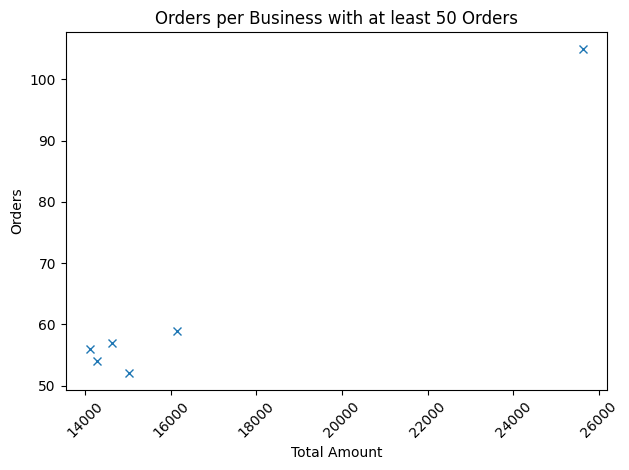

In [10]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt


# Aggregate data: count orders per business_id and sum amounts
agg_df = df_trans.groupby('business_id').agg(orders=('business_id', 'size'), total_amount=('amount', 'sum')).reset_index()

# Filter businesses with at least 50 orders
filtered_df = agg_df[agg_df['orders'] >= 50]

# Get top 6 businesses by total amount
top_businesses = filtered_df.nlargest(6, 'total_amount')

# Plot
plt.plot(top_businesses['total_amount'], top_businesses['orders'], linestyle='none', marker='x')
plt.xlabel('Total Amount')
plt.ylabel('Orders')
plt.title('Orders per Business with at least 50 Orders')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()


- Exercici 3 - Una variable categòrica. (correción)

Utilizo df_comp que hace referencia a la tabla de companies. Lo único que hago es contar las empresas por país viendo cuantas veces son mencionadas en la database usando size(). De esta manera podemos ver cuánto ocupa cada país y los vemos mencionados.

Queda añadido el valor de cada porción del gráfico. Creado también un 2o gráfico con porcentajes por que no conseguía que funcionase el gráfico con números totales en Power BI.

El porcentaje representa, cuantas empresas hay por país respecto al total sumado entre todos los países. España, China y Francia son los países con menor número de empresas.

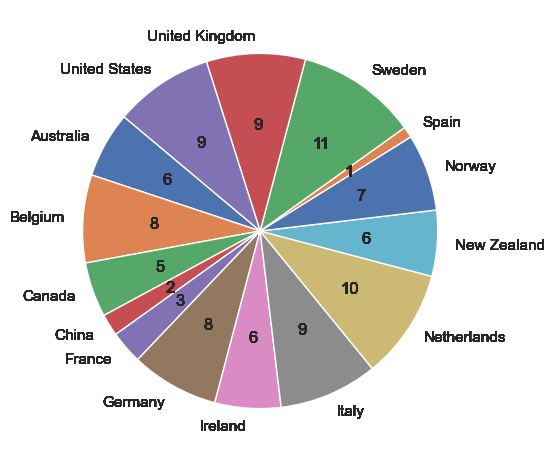

In [17]:
#ej 1 variable categorica
a=df_comp.groupby("country").size()
a1=df_comp.groupby("country")
a1.groups.keys()
a1l=list(a1.groups)

for i in (a1):
    values=df_comp['country'].value_counts(dropna=True)
    plt.pie(a, labels=a1l, startangle=140, autopct= lambda x: '{:.0f}'.format(x*values.sum()/100))

plt.tight_layout()
plt.show()

La versión final es la siguiente con los porcentajes ya que no conseguía que el código anterior con el número entero funcionase en Power BI.

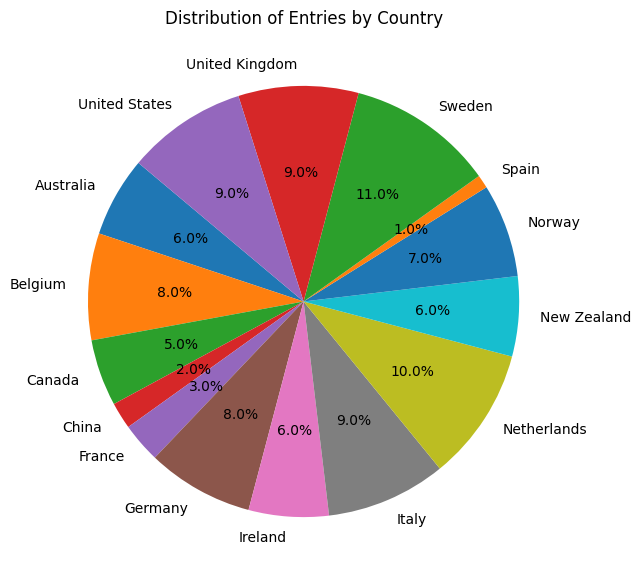

In [7]:

# Plot the pie chart
a=df_comp.groupby("country").size()
a1=df_comp.groupby("country")
plt.figure(figsize=(10, 7))
a.plot(kind='pie', autopct='%1.1f%%', startangle=140)

# Optional: Adding a title
plt.title('Distribution of Entries by Country')

# Display the plot
plt.ylabel('')  # Hide the y-label to make the plot cleaner
plt.show()


- Exercici 4 - Una variable categòrica i una numèrica.

Partimos de las fórmulas del ejercicio 1(Df_transcomp para el merge y res_transcomp para agrupar por país y pedido máximo). Creamos el groupby para agrupar por país y max amount. Creamos un barplot para obtener el gráfico por columnas y usamos la data del groupby (dresulte1). Con la ayuda de chatgpt usamos el annotate para que se vean las cantidades por columna.

Lo que vemos son los pedidos de mayor valor recibido por país. Alemania tuvo el pedido de más valor por un total de 499.23€, el siguiente es Reino Unido cuyo pedido más alto fue de 494.82€, seguido de Noruega, su pedido más alto fue de 494.17€, El país que tuvo el pedido más bajo fue España, su pedido más elevado fue de 80.56€.


C:\Users\amigu\AppData\Local\Temp\ipykernel_24492\3513538783.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_comp = pd.read_sql(query, con=mydb)
C:\Users\amigu\AppData\Local\Temp\ipykernel_24492\3513538783.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_trans = pd.read_sql(query2, con=mydb)


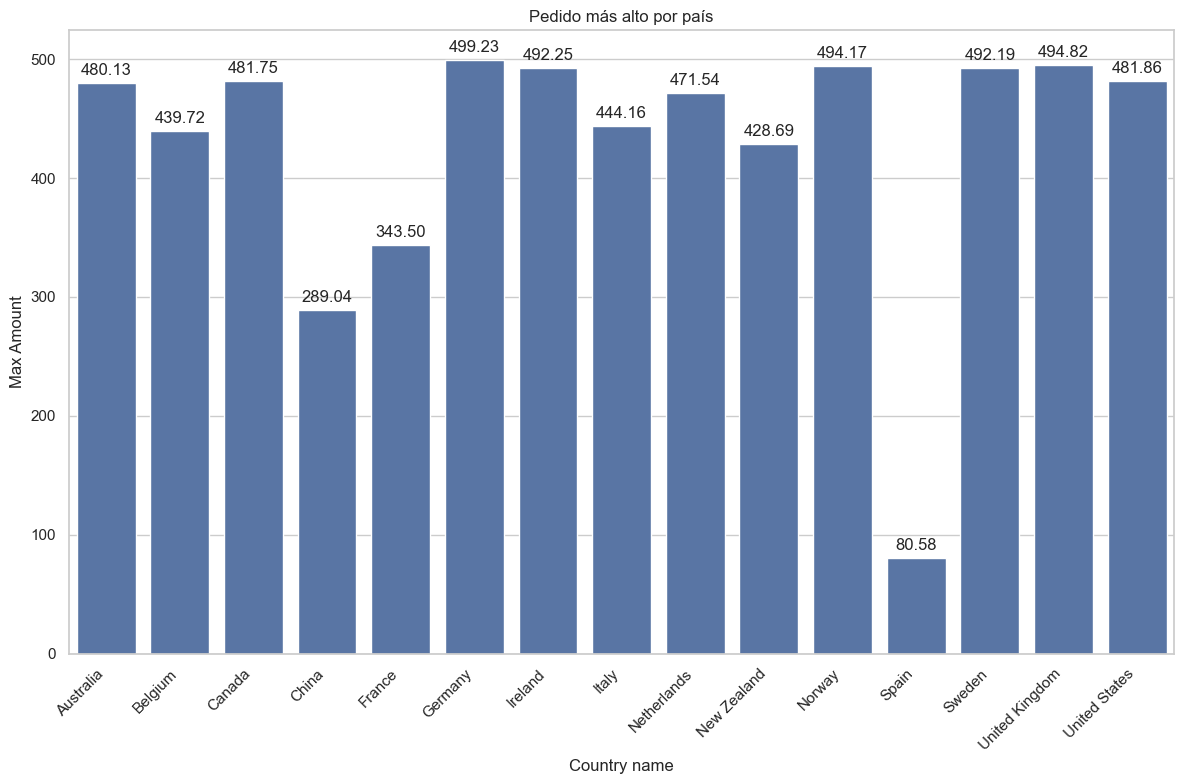

In [2]:
#ej  variable numerica y categorica

df_comp = pd.read_sql(query, con=mydb)
df_trans = pd.read_sql(query2, con=mydb)
df_transcomp = pd.merge(df_trans, df_comp, left_on = "business_id", right_on = "company_id", how="inner")
res_transcomp = df_transcomp.groupby("country").max("amount")



plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
barplot = sns.barplot(x="country", y="amount",data = res_transcomp)
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),  # Offset text by 9 points vertically
                     textcoords = 'offset points')
plt.xlabel("Country name")
plt.ylabel("Max Amount")
plt.title("Pedido más alto por país")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


- Exercici 5 - Dues variables categòriques.

Para hacer este diagram de venn tenemos que instalar matplotlib_venn e importar venn2. Partimos de df_transcomp y de ahí sacamos los users que compran en empresas de Germany o de United Kingdom. Lo conseguimos porque al leer el dataframe df_trans podemos ver a que id de empresa están haciendo el pedido y de ahí podemos sacar el país de la compañía.

Sacamos que 76 usuarios compran en empresas situadas en Germany, y 47 en United Kingdom. De todos estos 3 compran tanto en Germany como en United Kingdom

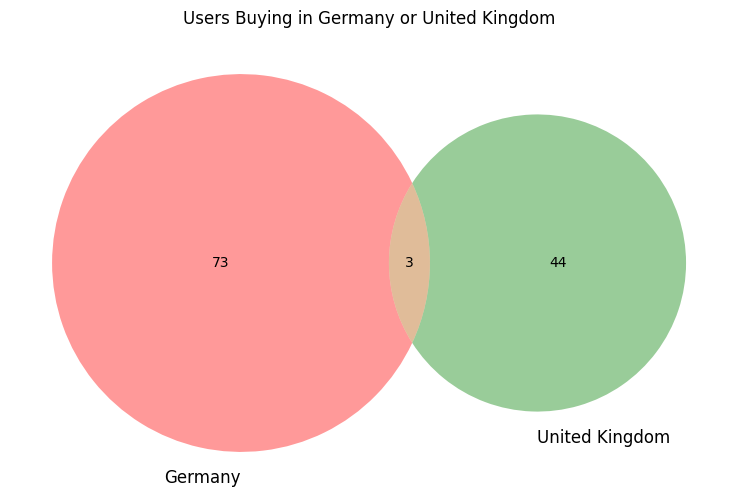

In [11]:
# dos variables categoricas
from matplotlib_venn import venn2
df_transcomp = pd.merge(df_trans, df_comp, left_on = "business_id", right_on = "company_id", how="inner")



users_germany = set(df_transcomp[df_transcomp['country'] == 'Germany']['user_id'])
users_uk = set(df_transcomp[df_transcomp['country'] == 'United Kingdom']['user_id'])

# Plot the Venn diagram
plt.figure(figsize=(10, 6))
venn2([users_germany, users_uk], ('Germany', 'United Kingdom'))
plt.title('Users Buying in Germany or United Kingdom')
plt.show()

- Exercici 6 - Tres variables.

Partiendo de df_transcomp, hacemos lo mismo que en el ejercicio 2 y pasamos el timestamp a mes. Luego para la data del heatmap agrupamos por el nuevo timestamp mensual (year-month), contamos la presencia de cada mes usando la función size() y así saber el número de pedidos por mes. Por último, le damos estos datos para que se haga el mapa de calor por mes, país y cantidad de pedidos.
Las tres variables usadas:

Year – Month (extraídos de timestamp): Para poder saber en qué momento (mes y año) se hizo la compra.
Size(): Contar el número de pedidos, contando el número de veces que sale cada país mencionado.
Country: Para saber a qué país se hizo la compra del pedido, o lo que es lo mismo, la localización de la empresa.

En azulo oscuro vemos los meses donde han habido más compras. Siendo Alemania el país con más transacciones en los dobles digitos, abril, mayo, junio, agosto, octubre y diciembre, siendo los meses con más pedidos, diciembre siendo el que más con 14 pedidos.


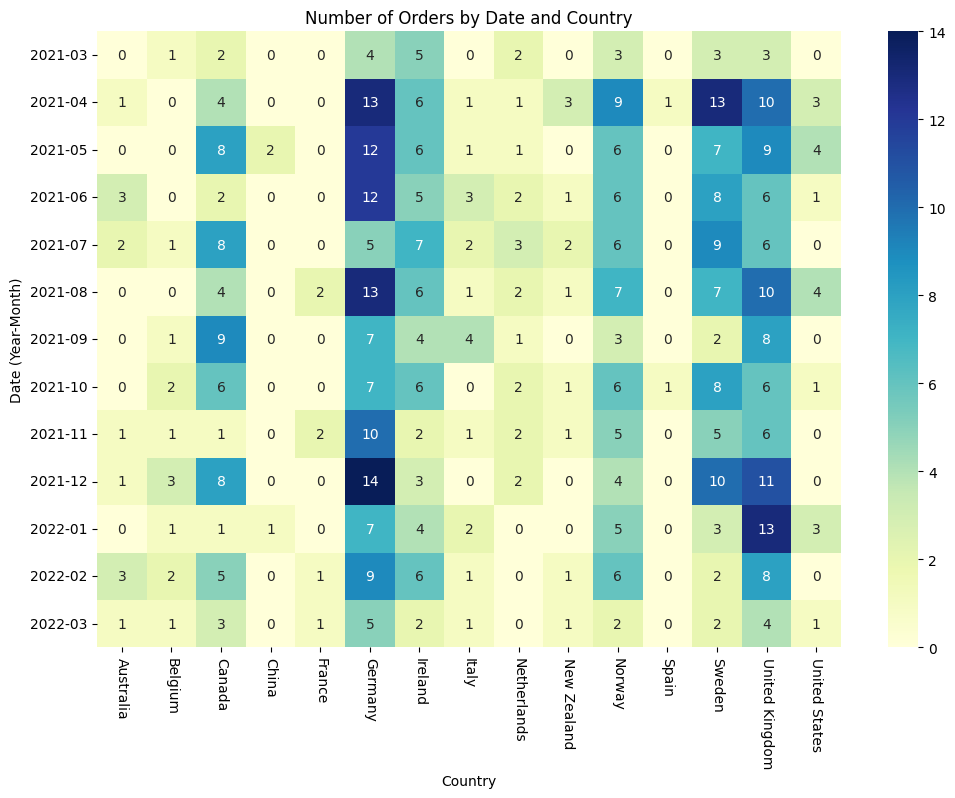

In [12]:
#3 variables
df_transcomp = pd.merge(df_trans, df_comp, left_on = "business_id", right_on = "company_id", how="inner")
# Convert the timestamp column to datetime
df_transcomp['timestamp'] = pd.to_datetime(df_transcomp['timestamp'])

# Extract the date (year-month) for aggregation
df_transcomp['year_month'] = df_transcomp['timestamp'].dt.to_period('M')

# Aggregate the data by year_month and country to count orders
heatmap_data = df_transcomp.groupby(['year_month', 'country']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Number of Orders by Date and Country')
plt.xlabel('Country')
plt.ylabel('Date (Year-Month)')
plt.xticks(rotation=-90)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.show()


- Exercici 7 - Graficar un Pairplot. (corregido)
Para hacer el pairplot partiendo de transusers, creo el dataframe tu_df para reducirlo a user_id, country, y amount. Haciendo la suma de amount y contando las veces que sale cada user_id usando size. Podemos crear el gráfico que mide cuantos pedidos se han hecho por usuario (orders) y cual es su gasto total (total_amount)

Todos los usuarios de United Kingdom gastan mas o menos lo mismo, tienen pedidos de bajo coste.
La mayoría de usuarios de Canada gastan por encima respecto a los usuarios de United Kingdom, sin embargo, de los 8 usuarios que salen destacados, 4 son de Canada y el top 3 de pedidos son todo usuarios canadienses.
Los otros cuatro usuarios grandes son todos de United States pero por debajo de los mayores consumidores de Canada.

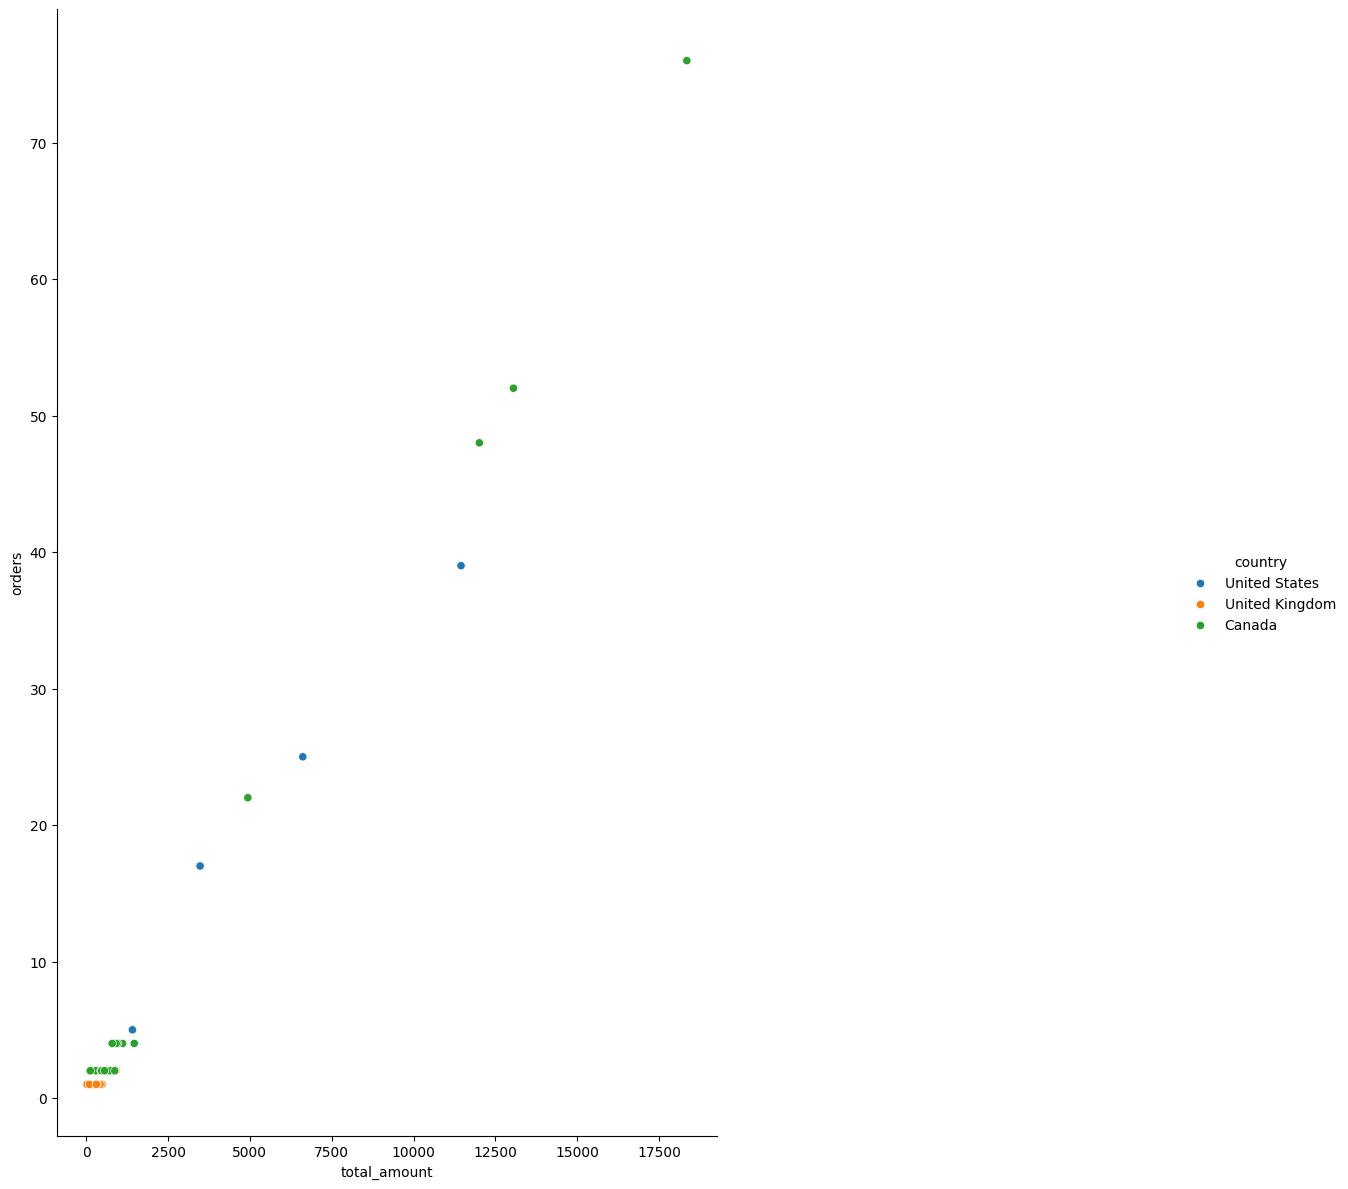

In [19]:
df_transusers = pd.merge(df_trans, df_users, left_on = "user_id", right_on = "id", how="inner")
tu_df = df_transusers.groupby(['user_id',"country"]).agg(orders=('user_id', 'size'), total_amount=('amount', 'sum')).reset_index()



gra = sns.pairplot(tu_df,
                   y_vars= "orders",
                   x_vars= "total_amount",
                   hue="country"
    )
gra.figure.set_size_inches(15,15)

Nivel 2 - Exercici 1 - Correlació de totes les variables numèriques.

Aquí vemos la correlación entre todos los valores númericos entre todas las columnas del dataframe query2 que hace referencia a la tabla de transacciones. Necesario poner “numeric_only = True”, ya que sino intentará hacer relaciones con variables categóricas.

In [16]:
#nivel 2, correlacion variables numericas
df_trans = pd.read_sql(query2, con=mydb)

        
df_trans.corr(numeric_only=True)



D:\users\ciberconnecta_11\AppData\Local\Temp\ipykernel_18780\4066685453.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_c = pd.read_sql(query2, con=mydb)


,amount,declined,user_id,lat,longitude
amount,1.000000,-0.037882,-0.035354,0.078116,0.043439
declined,-0.037882,1.000000,0.414293,0.010402,-0.002523
user_id,-0.035354,0.414293,1.000000,-0.004486,0.017145
lat,0.078116,0.010402,-0.004486,1.000000,-0.006894
longitude,0.043439,-0.002523,0.017145,-0.006894,1.000000


Corrección Lucía: 

El primer paso de jugar con la matrix para poder crear el mapa de calor fue jugar con el estilo y ver si podía acotar las columnas que estaba usando ya que así no usaba las categóricas de declined y user_id.

In [20]:
df_trans = pd.read_sql(query2, con=mydb)
d_matrix = pd.DataFrame(df_trans, columns=['amount', 'lat', 'longitude'])
matrix = d_matrix.corr()
matrix.style.background_gradient(cmap='coolwarm', axis=None)

D:\users\ciberconnecta_11\AppData\Local\Temp\ipykernel_18780\1323706851.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_c = pd.read_sql(query2, con=mydb)


,amount,lat,longitude
amount,1.000000,0.078116,0.043439
lat,0.078116,1.000000,-0.006894
longitude,0.043439,-0.006894,1.000000


Al final después de trastear puedo crear el heatmap con solo las variables numéricas acordadas, amount, lat y longitud.

D:\users\ciberconnecta_12\AppData\Local\Temp\ipykernel_19756\3788029143.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_trans = pd.read_sql(query2, con=mydb)


<Axes: >

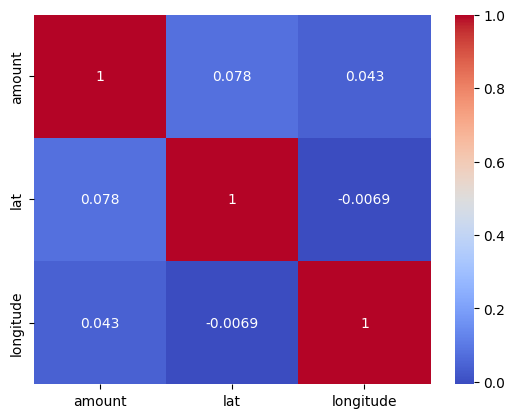

In [3]:
df_trans = pd.read_sql(query2, con=mydb)
d_matrix = pd.DataFrame(df_trans, columns=['amount', 'lat', 'longitude'])
matrix = d_matrix.corr()
sns.heatmap(matrix, annot=True, cmap="coolwarm")

Exercici 2 - Implementa un jointplot.

En la priemra versión juego con lat y longitud por utilizar valores diferentes al resto de ejercicios. Utilizar longitud y latitud no tiene mucho sentido, pero quería utilizar otros valores a ver cómo funcionaba.

D:\users\ciberconnecta_12\AppData\Local\Temp\ipykernel_19756\2949366111.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_trans = pd.read_sql(query2, con=mydb)


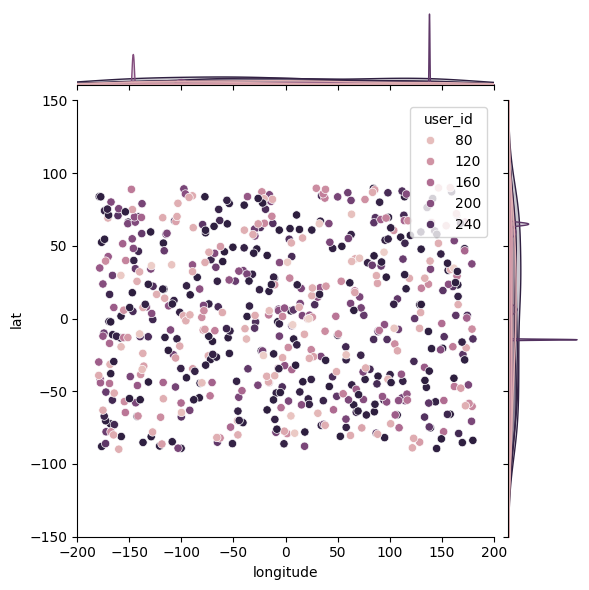

In [4]:
#nivel 2, jointplot
df_trans = pd.read_sql(query2, con=mydb)


ad=sns.jointplot(df_trans, x="longitude", y="lat", hue="user_id",xlim=(-200, 200), ylim=(-150, 150))

Este es mi jointplot definitivo, viendo el amount por user_id para ver el valor de los pedidos por usuario.

D:\users\ciberconnecta_12\AppData\Local\Temp\ipykernel_19756\865227989.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_trans = pd.read_sql(query2, con=mydb)


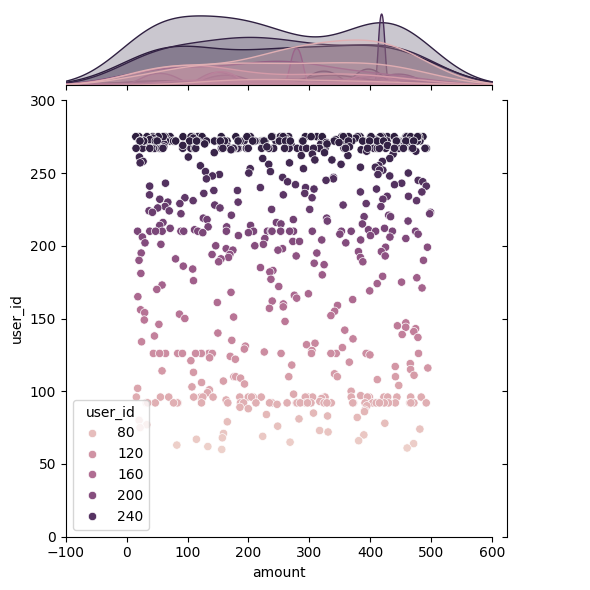

In [5]:
df_trans = pd.read_sql(query2, con=mydb)


ad=sns.jointplot(df_trans, x="amount", y="user_id", hue="user_id",xlim=(-100, 600), ylim=(0, 300))

Nivel 3
Exercici 1 - Implementa un violinplot combinat amb un altre tipus de gràfic.
Tuve que investigar mucho para poder juntar dos gráficos diferentes, acabe usando un stripplot para que nos de esta especie de cuerpo dentro del violinplot.

corrección: ampliado el tamaño a (15,15), añadido paleta de colores para que se diferencie mejor el stripplot del violinplot, quitado declined por que se puede interpretar como categorica.

C:\Users\amigu\AppData\Local\Temp\ipykernel_20792\794720607.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_trans = pd.read_sql(query2, con=mydb)


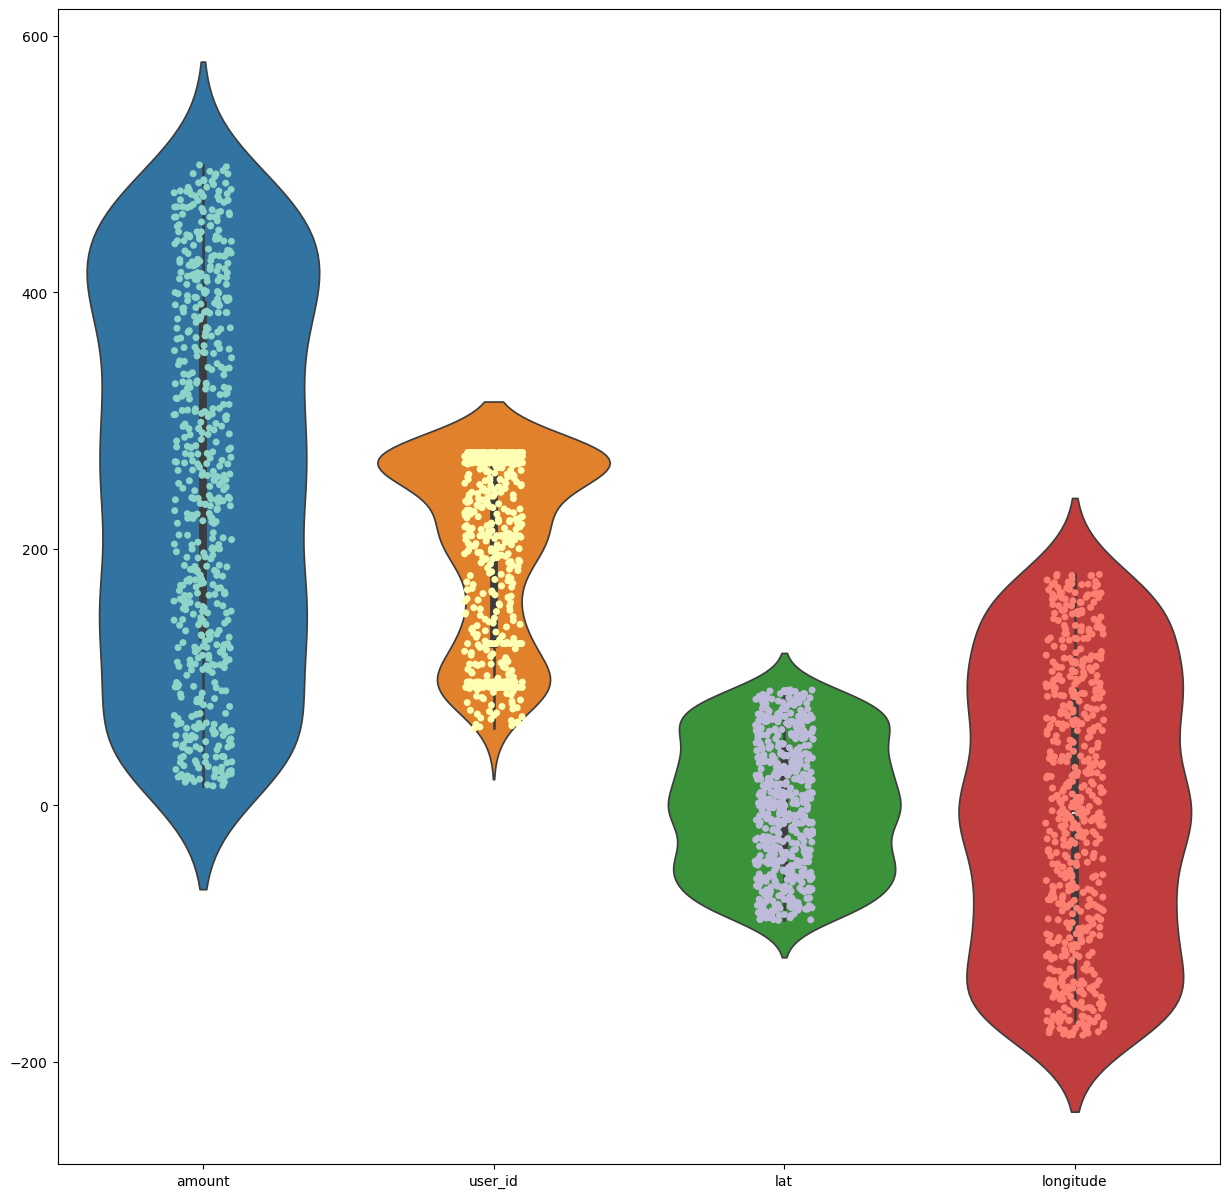

In [15]:
#nivel 3, violinplot
df_trans = pd.read_sql(query2, con=mydb)

ddroptrans = df_trans.drop('declined',axis=1)

graf1 = sns.violinplot(ddroptrans)
graf2 = sns.stripplot(ddroptrans,palette='Set3')

graf1.figure.set_size_inches(15,15)



Nivel 3 - Exercici 2 - Genera un FacetGrid per a visualitzar múltiples aspectes de les dades simultàniament.

Para poder trabajar el facetgrid decidí que el gráfico me mostrase el pedido más alto y el más bajo de todos los usuarios del Reino Unido, utilizo el Reino Unido ya que es el país con menos usuarios (50).
Hago la unión entre df_trans y df_users para poder sacar la información de los usuarios y de sus transacciones, agrupo por amount máximo y minimo y por último filtro por país = United Kingdom.


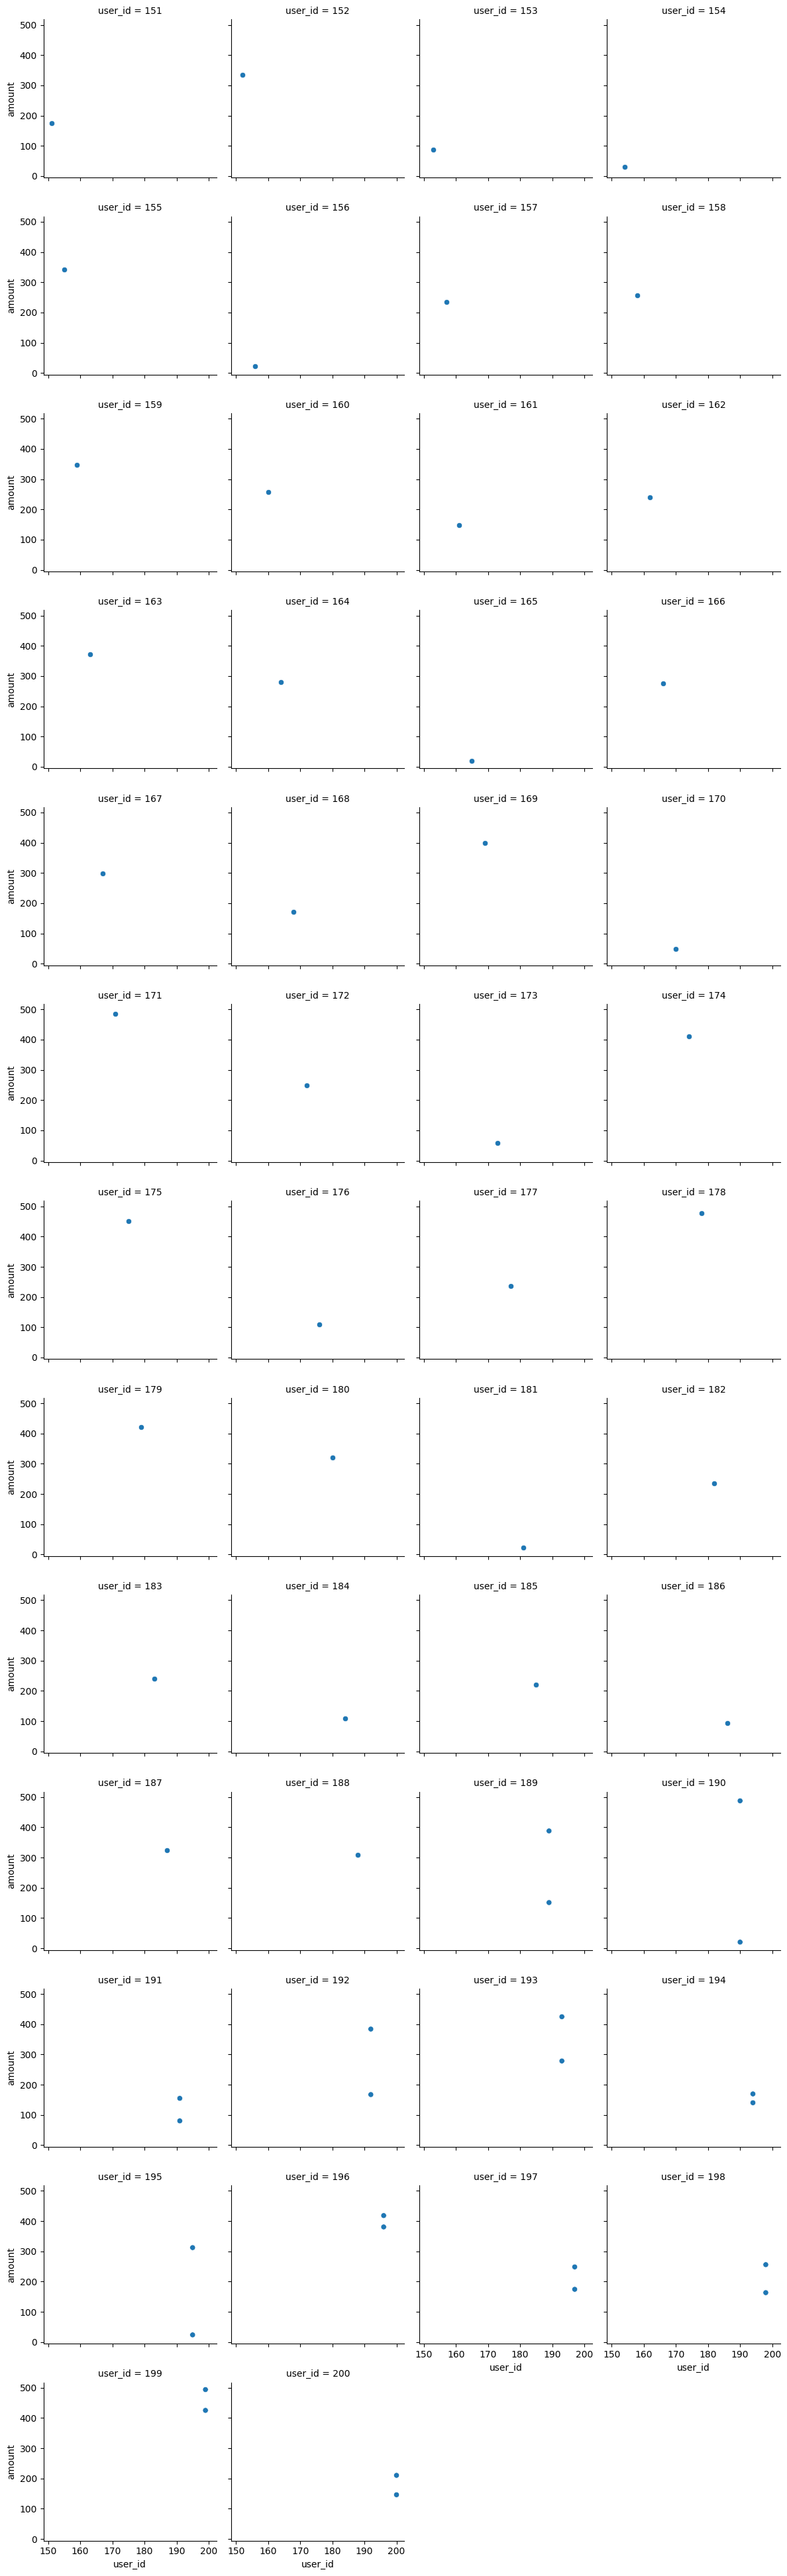

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_trans, df_comp, and df_users are already defined

# Merge dataframes

df_transusers = pd.merge(df_trans, df_users, left_on="user_id", right_on="id", how="inner")

# Groupby and aggregate
l3max = df_transusers.groupby("user_id").agg({'amount': 'max'}).reset_index()
l3min = df_transusers.groupby("user_id").agg({'amount': 'min'}).reset_index()

# Filter for UK users
l3_uk = df_transusers[df_transusers['country'] == 'United Kingdom']

# Plotting using FacetGrid
g = sns.FacetGrid(l3_uk, col="user_id", col_wrap=4)
g.map_dataframe(sns.scatterplot, x="user_id", y="amount", hue="declined")

plt.show()

1er intento de corrección. Cree unos gráficos que cuenta el valor de cada pedido por cada usuario en Canada y nos muestra el valor del pedido en la gráfica, en azul si ha sido aceptado y en naranja si ha sido rechazado. 


Nota: Hace falta bajar casi al final para ver usuarios con pedidos declinados.

Los usuarios 272 y 275 tienen muchos pedidos con pagos declinados.

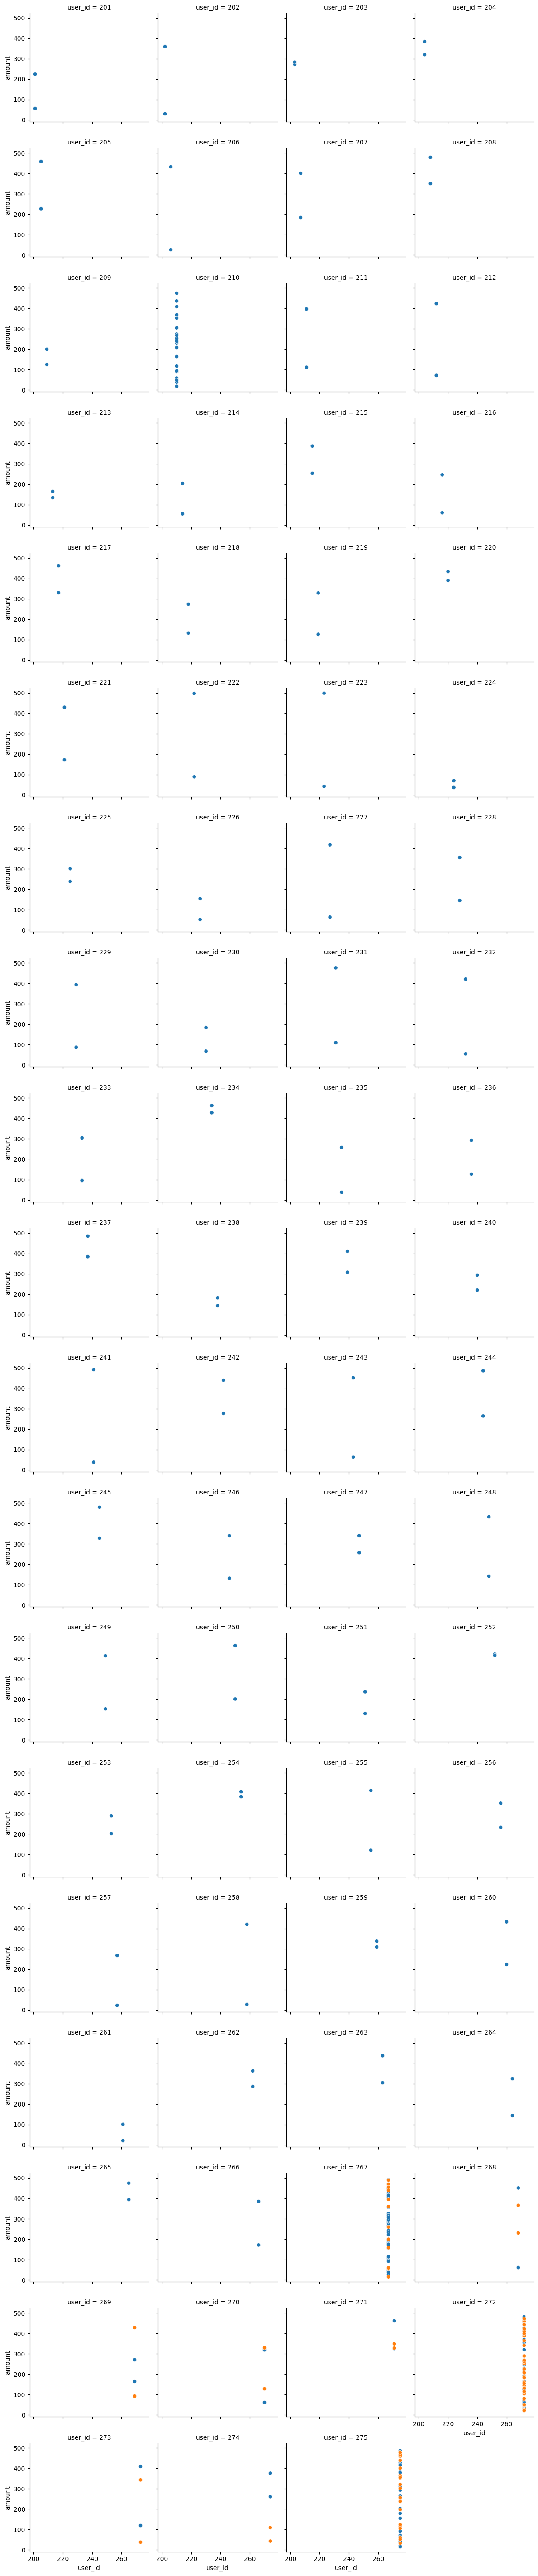

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_trans, df_comp, and df_users are already defined

# Merge dataframes

df_transusers = pd.merge(df_trans, df_users, left_on="user_id", right_on="id", how="inner")

# Filter for UK users
l3_ca = df_transusers[df_transusers['country'] == 'Canada']
l3_ca_sum = df_transusers.groupby(['user_id', 'country'])['amount'].sum().reset_index()
# Plotting using FacetGrid
g = sns.FacetGrid(l3_ca, col="user_id", col_wrap=4)
g.map_dataframe(sns.scatterplot, x="user_id", y="amount", hue="declined")

plt.show()

Intento de corrección nº2:

Suma total de la cantidad monetaria en pagos aceptados y pagos declinados por país.

La cantidad de dinero en pagos declinados en Canada es ligeramente superior a 20.000€

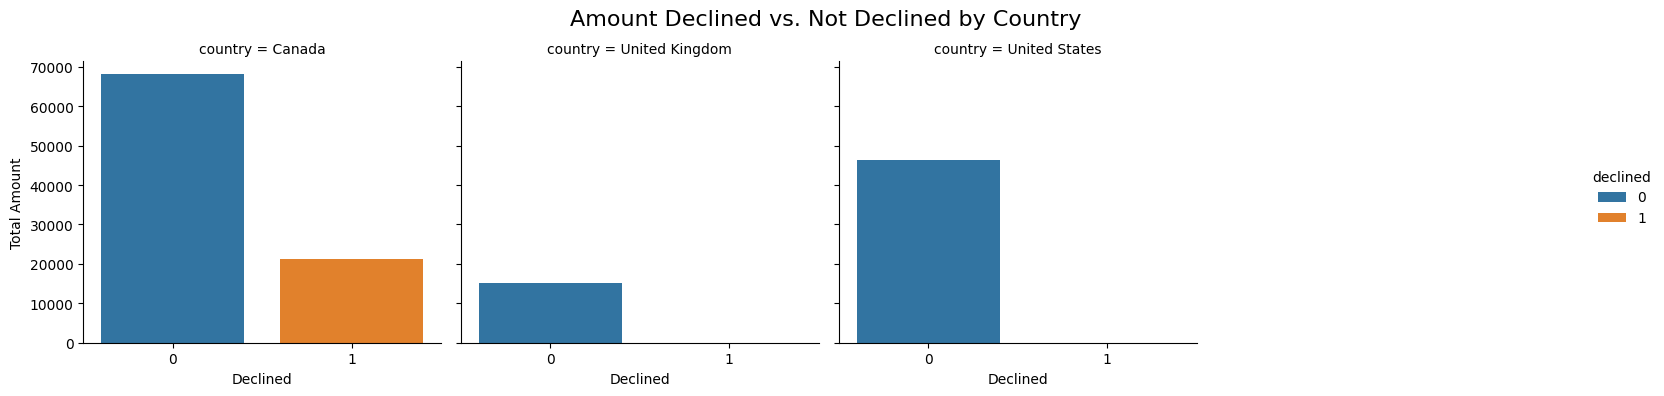

In [8]:


# Assuming l3m is the merged DataFrame from df_trans and df_users
df_transusers = pd.merge(df_trans, df_users, left_on="user_id", right_on="id", how="inner")

# Group by country and declined status, and calculate the sum of amounts
amounts_by_country_decline = df_transusers.groupby(['country', 'declined']).agg(
    total_amount=('amount', 'sum')
).reset_index()

# Create a FacetGrid to plot the data
g = sns.FacetGrid(amounts_by_country_decline, col='country', hue='declined', col_wrap=4, height=4)
g.map(sns.barplot, 'declined', 'total_amount', order=[0, 1], legend =False)

# Add legends and adjust the layout
g.add_legend()
g.set_axis_labels("Declined", "Total Amount")
g.figure.suptitle('Amount Declined vs. Not Declined by Country', fontsize=16)

plt.subplots_adjust(top=0.85)

plt.show()
